In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [16]:
"../Datasets/Locally Weighted Regression/"
dfx = pd.read_csv('../Datasets/Locally Weighted Regression/weightedX.csv')
dfy = pd.read_csv('../Datasets/Locally Weighted Regression/weightedY.csv')

X = dfx.values
Y = dfy.values



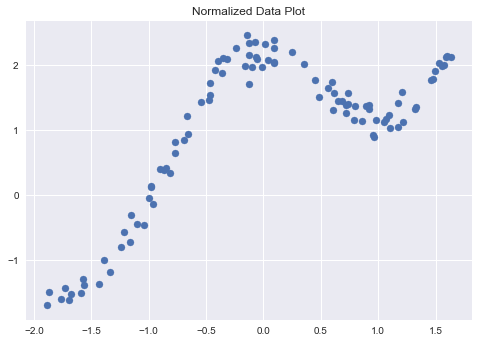

In [17]:
plt.style.use("seaborn")
#Normalize the Data
X = (X - X.mean())/X.std()
plt.figure(0)
plt.scatter(X,Y)
plt.title("Normalized Data Plot")
plt.show()


In [18]:
# Hypothesis Same for both linear and locally weighted regression
def getHypothesis(theta,x):
    return np.dot(theta,x)

#Function to compute wi
def getWeight(xi,x,bandwidthParam):
    return np.exp(((xi-x).T*(xi-x))/(-2*bandwidthParam*bandwidthParam))
#Helper Function to compute W      
def getWeightMatrix(query_x,x,bandwidthParam):
    no_of_samples = x.shape[0]
    #W is an identity matrix of size MXM
    W = np.mat(np.eye(no_of_samples))
    X = np.mat(x)
    for i in range(no_of_samples):
        W[i,i] = getWeight(query_x,x[i],bandwidthParam)
    return W

#Locally Weighted Linear Regression, Predict for a Query Point
def makePrediction(x,y,query_x,bandwidthParam=0.8):
    X = np.mat(x)
    ones = np.ones((x.shape[0],1))
    X = np.hstack((x,ones))
    X = np.mat(X)
    #Using the formula : theta =(X′WX)inv * X′WY
    X = np.mat(X)
    Y = np.mat(y)
    W = getWeightMatrix(query_x,x,bandwidthParam)
    XT = X.T
    YT = Y.T
    
    firstPart = XT*(W*X)
    secondPart = (XT*(W*Y))
    
    theta = np.linalg.pinv(firstPart)*secondPart
    hx = theta[0][0]*query_x  + theta[1][0]
    return hx,theta

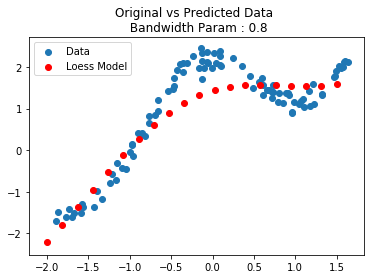

In [92]:
#Test Function
def LocallyWeightedTest():
    x_test = np.linspace(-2,1.5,20)
    y_test = []
    for i in x_test:
        y_predicted,theta = makePrediction(X,Y,i,0.8)
        y_test.append(y_predicted[0][0])

    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)
    plt.figure(0)
    plt.scatter(X,Y,label="Data")
    y_test = y_test.reshape((20,))
    plt.scatter(x_test,y_test,c='r',label="Loess Model")
    plt.title("Original vs Predicted Data \n Bandwidth Param : 0.8")
    plt.legend()
    plt.show()
    
LocallyWeightedTest()



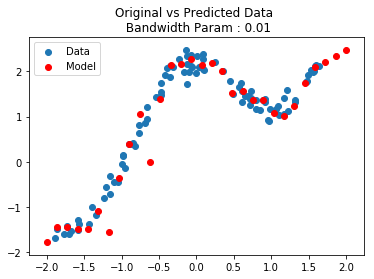

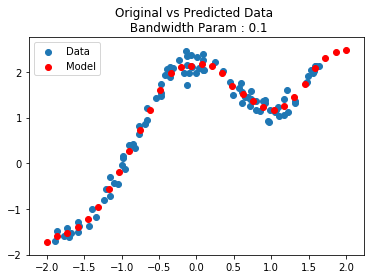

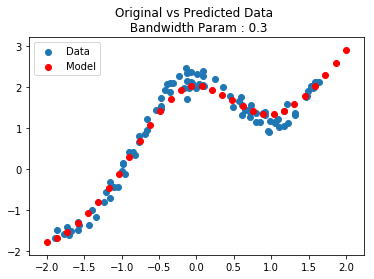

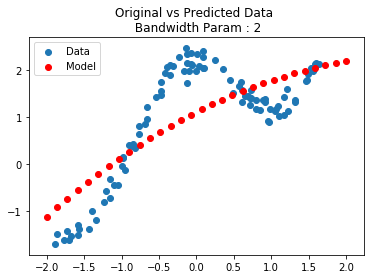

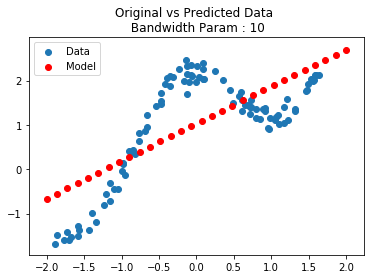

In [85]:

def testBandwidthParams(minX,maxX,bandwidthParams,testPointsCount):
    
    
    j=0
    for bandwidthParam in bandwidthParams:
        x_test = np.linspace(minX,maxX,testPointsCount)
        y_test = []

        for i in x_test:
            y_predicted,theta = makePrediction(X,Y,i,bandwidthParam)
            y_test.append(y_predicted)
            
        y_test = np.asarray(y_test)
        plt.figure(j+2)
        
        plt.scatter(X,Y,label="Data")
        y_test = y_test.reshape((30,))
        plt.scatter(x_test,y_test,c='r',label="Model")
        plt.legend()
        
        plt.title("Original vs Predicted Data \n Bandwidth Param : "+str(bandwidthParam))
        plt.show()
        j = j + 1
        
testBandwidthParams(-2,2,[0.01,0.1,0.3,2,10],30)